## Situação-problema: base de dados Iris
* Classificação com árvore de decisão
* Prever a espécie de uma dada flor: Iris-setosa, Iris-versicolor ou Iris-virginica.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ect-comp/ml/refs/heads/master/dados/Iris.csv')

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Atributos
* Entrada:
  * Comprimento da sépala;
  * Largura da sépala;
  * Comprimento da pétala;
  * Largura da pétala.
* Saída:
  * Se a espécie é Iris-setosa, Iris-versicolor ou Iris-virginica.

In [ ]:
X = df[['SepalLengthCm',	'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
y = df[['Species']].to_numpy()
print(y[:5])

[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]


## Divisão dos conjuntos de dados (treinamento e teste)
* 25% dos dados são reservados para treinamento, e 75% para teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (112, 4)
y_train shape: (112, 1)
X_test shape: (38, 4)
y_test shape: (38, 1)


## Treinamento
* Árvore de decisão com profundidade máxima de 3.

In [ ]:
# Treinando uma árvore de decisão com profundidade máxima de 3 e use como critério de seleção de atributos a entropia. Use a biblioteca 'sklearn'.

from sklearn.tree import DecisionTreeClassifier

# Criando um classificador de árvore de decisão com profundidade máxima de 3 e critério de seleção de atributos baseado em entropia
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# Treinando o classificador com os dados de treinamento
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Diagrama da árvore treinada

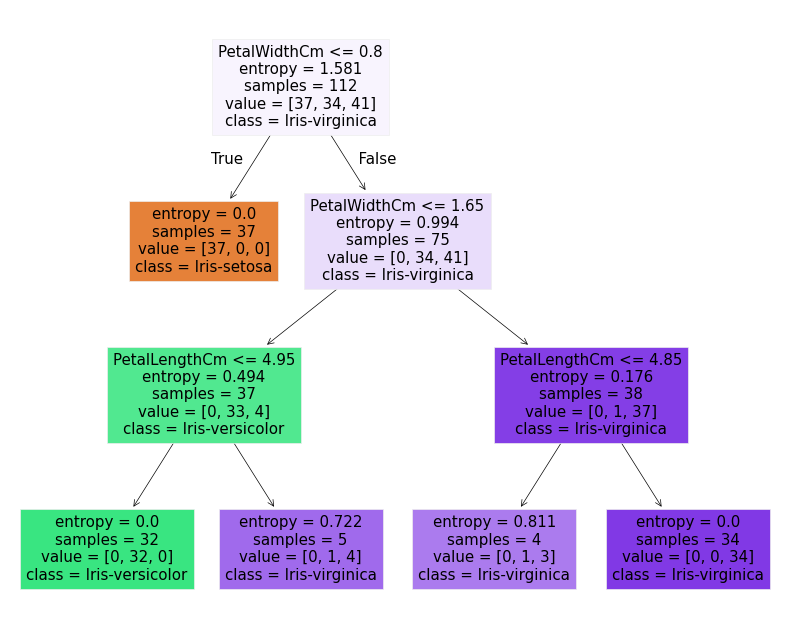

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)
plt.show()


## Avaliação (acurácia e matriz de confusão)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Fazer previsões nos dados de teste
y_pred = clf.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

# Calcular a matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusão:\n{confusion_matrix}")

Acurácia: 0.9736842105263158
Matriz de confusão:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


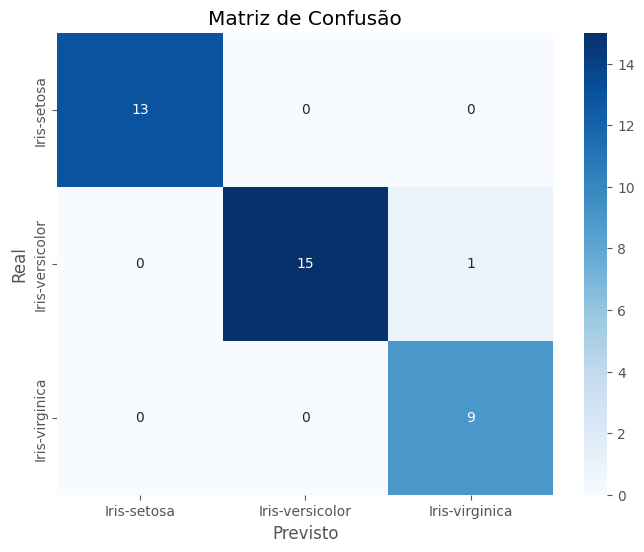

In [ ]:
# prompt: Imprima a matriz de confusão deste problema com uma figura rica em cores

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
